In [ ]:
#data Sequential (1,2,3)-----> timesplit (data regresi)
#data Supervised (x,y)----> train test splitter (classifier, regressor (pakai Super Vector Machine))

In [ ]:
#alur :
#1. siapin data
#2. define model2 nya
#model = Sequential(LSTM(2),Dense(1)) ---->sama aja kaya cara di bawah
#model = Sequential()
#model.add(LSTM(2, input_shape(2,1,0)))
#model.add(Dense(1))
#model.Activation("sigmoid")
#model.compile(optimizer="sgd", loss="mse")
#data = data.reshape()
#model.fit(x_train,y_train,batch_size=12,epoch=1000) ----> ini di training
#loss,accuracy = model.evaluate(x,y)
#model.predict(x,y)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [2]:
df = pd.read_csv("MSFT.csv",na_values=["null"],index_col="Date",parse_dates=True,infer_datetime_format=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-08-09,42.81250,42.90625,41.84375,41.90625,26.678083,39333600
1999-08-10,41.78125,42.03125,40.81250,41.46875,26.399563,62743000
1999-08-11,42.00000,42.34375,41.15625,42.09375,26.797453,66105200
1999-08-12,41.96875,42.09375,40.81250,40.87500,26.021582,61062000
1999-08-13,41.46875,42.81250,41.37500,42.34375,26.956615,65099800


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5390.000000,5390.000000,5390.000000,5390.000000,5390.000000,5.390000e+03
mean,49.551305,50.077055,49.019044,49.561910,43.048048,5.451465e+07
std,42.360123,42.801701,41.884993,42.373713,44.308013,3.126808e+07
min,15.200000,15.620000,14.870000,15.150000,11.608222,7.425600e+06
25%,26.750000,27.022500,26.471249,26.740000,19.177396,3.245735e+07
50%,30.450001,30.767499,30.134999,30.480000,22.633795,4.969115e+07
75%,49.862499,50.460001,49.497498,49.869999,42.802543,6.781708e+07
max,229.270004,232.860001,227.350006,231.649994,231.045105,5.910522e+08


In [19]:
df.shape

(5390, 6)

<AxesSubplot:xlabel='Date'>

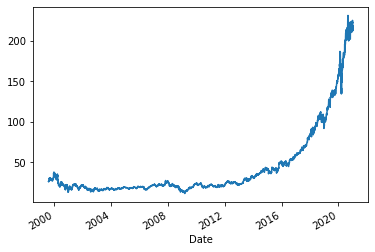

In [20]:
df["Adj Close"].plot()

In [21]:
#untuk test korelasi
X = df.drop(["Adj Close"],axis=1)
X = X.drop(["Close"],axis=1)

In [22]:
X.head()

,Open,High,Low,Volume
Date,,,,
1999-08-09,42.81250,42.90625,41.84375,39333600
1999-08-10,41.78125,42.03125,40.81250,62743000
1999-08-11,42.00000,42.34375,41.15625,66105200
1999-08-12,41.96875,42.09375,40.81250,61062000
1999-08-13,41.46875,42.81250,41.37500,65099800


<AxesSubplot:>

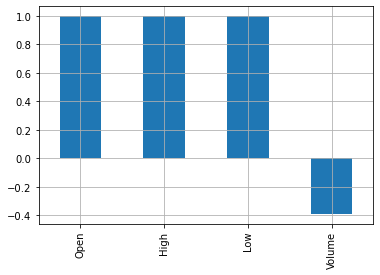

In [24]:
X.corrwith(df["Adj Close"]).plot.bar(grid=True)

In [25]:
test = df
target_adj_close  = pd.DataFrame(df["Adj Close"])
feature_columns = ["Open","High","Low","Volume"]

In [26]:
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1999-08-09,0.128988,0.125604,0.126947,0.054672
1999-08-10,0.124171,0.121576,0.122094,0.094782
1999-08-11,0.125193,0.123015,0.123712,0.100543
1999-08-12,0.125047,0.121864,0.122094,0.091902
1999-08-13,0.122711,0.125173,0.124741,0.098820


In [29]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

validation_x = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]

In [32]:
ts_split = TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
    X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index):]
    Y_train, Y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index):].values.ravel()

In [33]:
X_test.shape

(481, 4)

In [34]:
X_train.shape

(4819, 4)

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
modelawal = dt.fit(X_train, Y_train)

In [36]:
Y_pred1 = modelawal.predict(X_test)

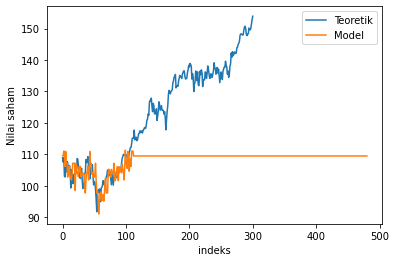

In [37]:
plt.plot(Y_test, label="Teoretik")
plt.plot(Y_pred1, label="Model")
plt.xlabel("indeks")
plt.ylabel("Nilai saham")
plt.legend()
plt.show()

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_ts_t = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [48]:
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.models import Sequential

K.clear_session()
model=Sequential()
model.add(LSTM(16, input_shape=(1,X_train.shape[1]), activation= "relu", return_sequences=False))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
early_stop = EarlyStopping(monitor="loss", patience=5, verbose=1)
history_model_lstm = model.fit(X_tr_t, Y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
603/603 [==============================] - 1s 2ms/step - loss: 874.9545
Epoch 2/200
603/603 [==============================] - 1s 2ms/step - loss: 311.6617
Epoch 3/200
603/603 [==============================] - 1s 2ms/step - loss: 157.1542
Epoch 4/200
603/603 [==============================] - 1s 2ms/step - loss: 134.1618
Epoch 5/200
603/603 [==============================] - 1s 2ms/step - loss: 120.1488
Epoch 6/200
603/603 [==============================] - 1s 2ms/step - loss: 93.1594
Epoch 7/200
603/603 [==============================] - 1s 2ms/step - loss: 68.1812
Epoch 8/200
603/603 [==============================] - 1s 2ms/step - loss: 48.1090: 0s -
Epoch 9/200
603/603 [==============================] - 1s 2ms/step - loss: 33.6976
Epoch 10/200
603/603 [==============================] - 1s 2ms/step - loss: 24.2862
Epoch 11/200
603/603 [==============================] - 1s 2ms/step - loss: 18.5217
Epoch 12/200
603/603 [==============================] - 1s 2ms/step - loss

In [51]:
Y_pred_test = model.predict(X_ts_t)

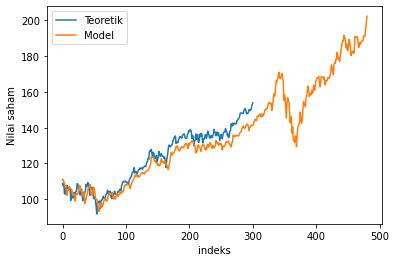

In [52]:
plt.plot(Y_test, label="Teoretik")
plt.plot(Y_pred_test, label="Model")
plt.xlabel("indeks")
plt.ylabel("Nilai saham")
plt.legend()
plt.show()